<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Shapelets </font> </center>

<Axes: >

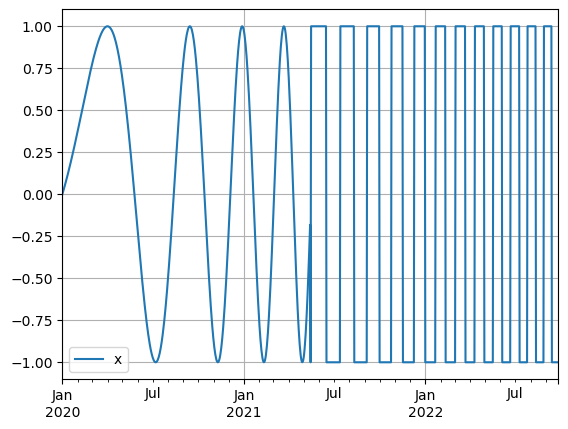

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def cuadrada(x,a=1):
    Y=np.sin(x)
    s=[]
    for y in Y:
        if y<0:
            s.append(-a)
        elif y>0:
            s.append(a)
    return np.array(s)
N=1000
t=pd.date_range('2020-01-01',periods=N)
w1=np.linspace(0.01,0.05,N//2)
w2=np.linspace(0.05,0.1,N//2)

x1=np.sin(w1*np.arange(N//2))
x2=cuadrada(w2*np.arange(N//2+1,N+1))
x=np.concatenate([x1,x2])
st=pd.DataFrame(index=t,data=x,columns=['x'])
st.plot(grid=True)

In [67]:
st

,x
2020-01-01,0.000000
2020-01-02,0.010080
2020-01-03,0.020319
2020-01-04,0.030717
2020-01-05,0.041271
...,...
2022-09-22,-1.000000
2022-09-23,-1.000000
2022-09-24,-1.000000
2022-09-25,-1.000000


<Axes: >

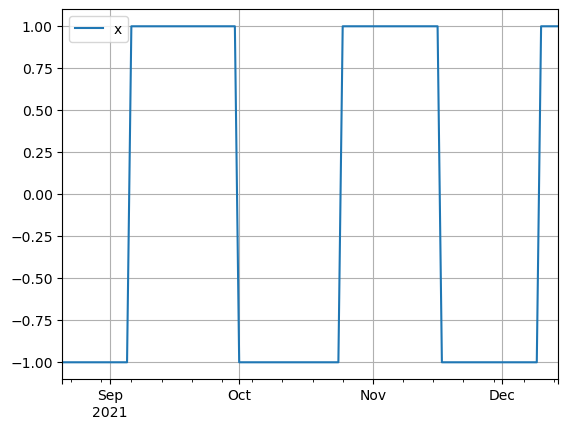

In [68]:
# Inicialización de parámetros de la shapelet candidata
w=np.random.randint(50,200)
i=np.random.randint(0,(N-w))
s=st[i:i+w]
s.plot(grid=True)

In [69]:
w


116

In [70]:
i

598

In [71]:
from scipy.stats import zscore

In [72]:
# Encontramos la relación entre la shapelet candidata y la serie de tiempo
#
# Definimos la métrica
def C(a,b):   # Correlación ('a' y 'b' de longitud 'm')
    m=len(a)
    ma=np.mean(a)
    mb=np.mean(b)
    sa=np.std(a)
    sb=np.std(b)
    return (np.sum(a*b)-m*ma*mb)/(m*sa*sb)
def d(a,b):   # distancia (métrica)
    a=zscore(a)
    b=zscore(b)
    return np.sqrt(2*(1-np.round(C(a,b),5)))

In [73]:
m=100
a=np.random.rand(m)
b=np.random.rand(m)
d(a,b)

1.2531639956526042

In [74]:
d(a,2*a)

0.0

In [75]:
def C2(a,b): # Correlación ('a' y 'b' tienen diferente longitud)
    m=min(len(a),len(b))
    n=max(len(a),len(b))
    if len(a)>len(b):
        B=a
        A=b
    else:
        B=b
        A=a
    ma=np.mean(A)
    mb=np.mean(B)
    sa=np.std(A)
    sb=np.std(B)
    Corr=np.inf
    for l in range(n-m):
        Corr=min(Corr,(np.sum(A*B[l:l+m])-m*ma*mb)/(m*sa*sb))
    return Corr

In [76]:
def d2(a,b):   # distancia (métrica)
    a=zscore(a)
    b=zscore(b)
    res = np.sqrt(2*(1-np.round(C2(a,b),8)))
    return res

In [77]:
a=np.random.rand(100)
b=np.random.rand(150)
d2(a,b)

1.5216099303040842

In [78]:
a=np.random.rand(150)
b=np.random.rand(100)
d2(a,b)

1.5326928981371317

In [79]:
from scipy.optimize import minimize_scalar

In [80]:
minimize_scalar?

Signature:
minimize_scalar(
    fun,
    bracket=None,
    bounds=None,
    args=(),
    method=None,
    tol=None,
    options=None,
)
Docstring:
Local minimization of scalar function of one variable.

Parameters
----------
fun : callable
    Objective function.
    Scalar function, must return a scalar.
bracket : sequence, optional
    For methods 'brent' and 'golden', `bracket` defines the bracketing
    interval and is required.
    Either a triple ``(xa, xb, xc)`` satisfying ``xa < xb < xc`` and
    ``func(xb) < func(xa) and  func(xb) < func(xc)``, or a pair
    ``(xa, xb)`` to be used as initial points for a downhill bracket search
    (see `scipy.optimize.bracket`).
    The minimizer ``res.x`` will not necessarily satisfy
    ``xa <= res.x <= xb``.
bounds : sequence, optional
    For method 'bounded', `bounds` is mandatory and must have two finite
    items corresponding to the optimization bounds.
args : tuple, optional
    Extra arguments passed to the objective function.
meth

In [94]:
d2(s['x'].values,st['x'].values)

2.038361714711106

In [95]:
def obj(i,st,w):
    i=int(np.round(i))
    s=st[i:i+w]
    d = d2(s.values,st.values)
    return d

In [96]:
i

598

In [97]:
st['x']

2020-01-01    0.000000
2020-01-02    0.010080
2020-01-03    0.020319
2020-01-04    0.030717
2020-01-05    0.041271
                ...   
2022-09-22   -1.000000
2022-09-23   -1.000000
2022-09-24   -1.000000
2022-09-25   -1.000000
2022-09-26   -1.000000
Freq: D, Name: x, Length: 1000, dtype: float64

fn_obj = []
w=100
for k in range(0, N-w):
    fn_obj.append(obj(k,st['x'], w=w))
fn_obj_arr = np.array(fn_obj)

In [98]:
obj(889,st['x'], w=96)

2.045266134272017

In [99]:
# Modificar el valor de w
w=100

In [100]:
sol=minimize_scalar(obj,bounds=(0,N-w),method='Bounded',args=(st['x'],w))
sol

 message: Solution found.
 success: True
  status: 0
     fun: 1.8964092016228986
       x: 219.6071985214111
     nit: 36
    nfev: 36

<Axes: >

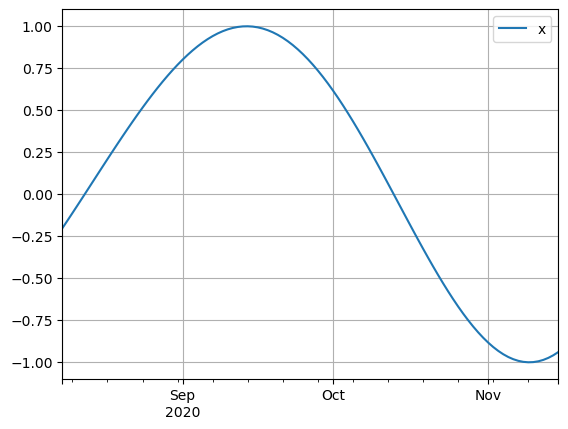

In [101]:
i1=int(np.round(sol.x))
s1=st[i1:i1+w]
s1.plot(grid=True)

In [102]:
i1

220

In [104]:
sol2=minimize_scalar(obj,bounds=(0,i1-w),method='Bounded',args=(st['x'],w)) # Buscamos por la izquierda de la primera shapelet
i2=int(np.round(sol2.x))
i2,sol2.fun

(46, 1.8623382668033217)

<Axes: >

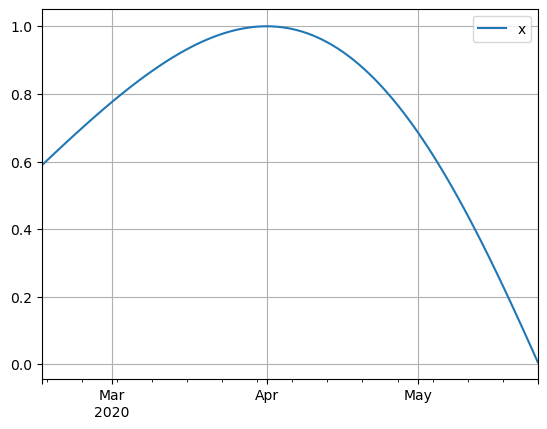

In [105]:
s2=st[i2:i2+w]
s2.plot(grid=True)

In [106]:
(i1+w,N-w)

(320, 900)

In [107]:
sol3=minimize_scalar(obj,bounds=(i1+w,N-w),method='Bounded',args=(st['x'],w))
i3=int(np.round(sol3.x))
i3,sol3.fun

(685, 2.0182667118099133)

<Axes: >

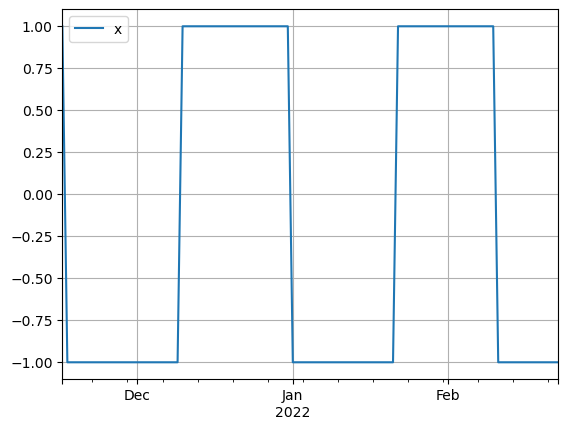

In [108]:
s3=st[i3:i3+w]
s3.plot(grid=True)

In [110]:
s1

,x,clase
2020-08-08,-0.202026,1
2020-08-09,-0.157418,1
2020-08-10,-0.112327,1
2020-08-11,-0.066843,1
2020-08-12,-0.021060,1
...,...,...
2020-11-11,-0.994138,1
2020-11-12,-0.985768,1
2020-11-13,-0.973745,1
2020-11-14,-0.958084,1


<Axes: >

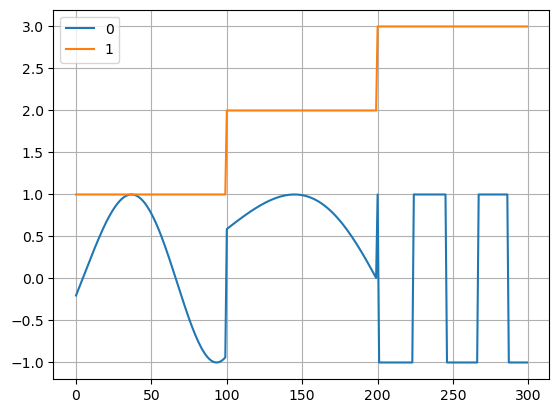

In [111]:
# Diccionario de patrones
#
# Escogemos s2 y s3 para clasificar 'st'
s1.loc[:,'clase']=1
s2.loc[:,'clase']=2
s3.loc[:,'clase']=3
S=np.concatenate([s1.values,s2.values,s3.values])
S=pd.DataFrame(S)
S.plot(grid=True)

In [112]:
S.columns=['x','clase']

In [113]:
S

,x,clase
0,-0.202026,1.0
1,-0.157418,1.0
2,-0.112327,1.0
3,-0.066843,1.0
4,-0.021060,1.0
...,...,...
295,-1.000000,3.0
296,-1.000000,3.0
297,-1.000000,3.0
298,-1.000000,3.0


In [114]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dtc=DecisionTreeClassifier(max_depth=5)
dtc.fit(S[['x']],S['clase'])

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [116]:
st

,x
2020-01-01,0.000000
2020-01-02,0.010080
2020-01-03,0.020319
2020-01-04,0.030717
2020-01-05,0.041271
...,...
2022-09-22,-1.000000
2022-09-23,-1.000000
2022-09-24,-1.000000
2022-09-25,-1.000000


<Axes: >

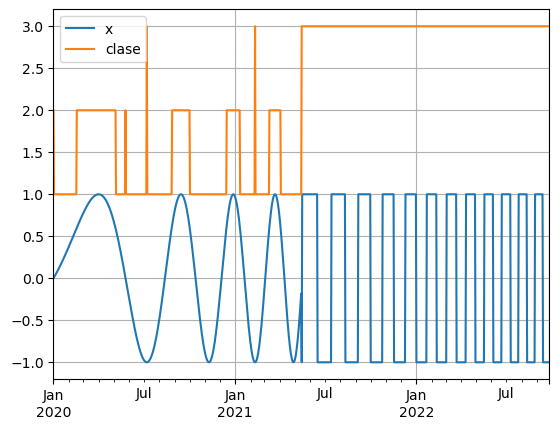

In [117]:
st['clase']=dtc.predict(st[['x']])
st.plot(grid=True)

In [118]:
st.groupby('clase')['x'].count()

clase
1.0    331
2.0    167
3.0    502
Name: x, dtype: int64